Deep Learning
=============

Assignment 2
------------

Previously in `1_notmnist.ipynb`, we created a pickle with formatted datasets for training, development and testing on the [notMNIST dataset](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html).

The goal of this assignment is to progressively train deeper and more accurate models using TensorFlow.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from six.moves import cPickle as pickle
from six.moves import range
import ggplot
from pandas import DataFrame
import pandas as pd

Using TensorFlow backend.


First reload the data we generated in `1_notmnist.ipynb`.

In [3]:
pickle_file = 'notMNIST.pickle'

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    train_dataset = save['train_dataset']
    train_labels = save['train_labels']
    valid_dataset = save['valid_dataset']
    valid_labels = save['valid_labels']
    test_dataset = save['test_dataset']
    test_labels = save['test_labels']
    del save  # hint to help gc free up memory
    print('Training set', train_dataset.shape, train_labels.shape)
    print('Validation set', valid_dataset.shape, valid_labels.shape)
    print('Test set', test_dataset.shape, test_labels.shape)

Training set (200000, 28, 28) (200000,)
Validation set (10000, 28, 28) (10000,)
Test set (10000, 28, 28) (10000,)


Reformat into a shape that's more adapted to the models we're going to train:
- data as a flat matrix,
- labels as float 1-hot encodings.

In [4]:
image_size = 28
num_labels = 10

def reformat(dataset, labels):
    dataset = dataset.reshape((-1, image_size * image_size)).astype(np.float32)
    # Map 0 to [1.0, 0.0, 0.0 ...], 1 to [0.0, 1.0, 0.0 ...]
    labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
    return dataset, labels
train_dataset, train_labels = reformat(train_dataset, train_labels)
valid_dataset, valid_labels = reformat(valid_dataset, valid_labels)
test_dataset, test_labels = reformat(test_dataset, test_labels)
print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

Training set (200000, 784) (200000, 10)
Validation set (10000, 784) (10000, 10)
Test set (10000, 784) (10000, 10)


We're first going to train a multinomial logistic regression using simple gradient descent.

> In Keras it seems we cannot do simple gradient descent, only stochastic gradient descent is available

In [5]:
model = Sequential()
model.add(Dense(10, input_dim=784, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit(
    train_dataset, 
    train_labels, 
    validation_data=(valid_dataset, valid_labels), 
    nb_epoch=20,
    verbose=2
)

Train on 200000 samples, validate on 10000 samples
Epoch 1/20
15s - loss: 0.7303 - acc: 0.8079 - val_loss: 0.6749 - val_acc: 0.8226
Epoch 2/20
12s - loss: 0.6546 - acc: 0.8270 - val_loss: 0.6588 - val_acc: 0.8261
Epoch 3/20
12s - loss: 0.6432 - acc: 0.8299 - val_loss: 0.6521 - val_acc: 0.8260
Epoch 4/20
12s - loss: 0.6375 - acc: 0.8313 - val_loss: 0.6499 - val_acc: 0.8262
Epoch 5/20
11s - loss: 0.6340 - acc: 0.8325 - val_loss: 0.6472 - val_acc: 0.8272
Epoch 6/20
11s - loss: 0.6314 - acc: 0.8334 - val_loss: 0.6443 - val_acc: 0.8289
Epoch 7/20
11s - loss: 0.6294 - acc: 0.8338 - val_loss: 0.6434 - val_acc: 0.8284
Epoch 8/20
11s - loss: 0.6279 - acc: 0.8339 - val_loss: 0.6424 - val_acc: 0.8303
Epoch 9/20
11s - loss: 0.6265 - acc: 0.8343 - val_loss: 0.6417 - val_acc: 0.8288
Epoch 10/20
12s - loss: 0.6253 - acc: 0.8350 - val_loss: 0.6415 - val_acc: 0.8296
Epoch 11/20
11s - loss: 0.6244 - acc: 0.8351 - val_loss: 0.6411 - val_acc: 0.8304
Epoch 12/20
12s - loss: 0.6236 - acc: 0.8351 - val_loss:

In [10]:
df = DataFrame(history.history)
df.index.name = 'epoch'

In [11]:
df.head()

,acc,loss,val_acc,val_loss
epoch,,,,
0,0.807895,0.730348,0.8226,0.674889
1,0.826965,0.654588,0.8261,0.658794
2,0.829910,0.643215,0.8260,0.652086
3,0.831265,0.637480,0.8262,0.649922
4,0.832475,0.633959,0.8272,0.647168


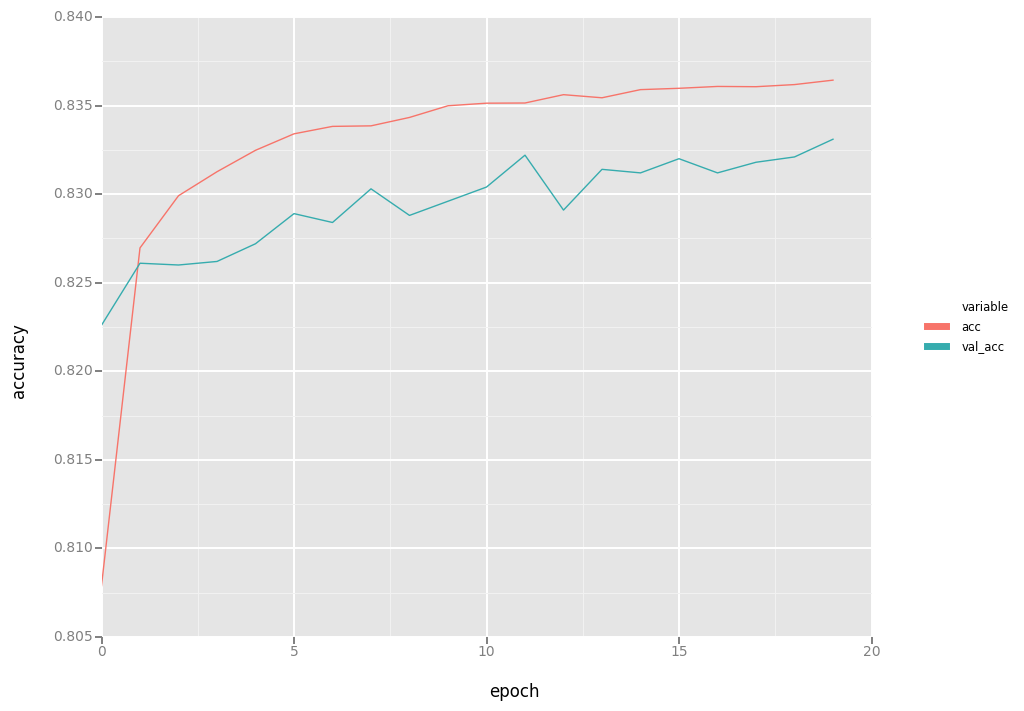

<ggplot: (343660899)>

In [12]:
ggplot.ggplot(
    ggplot.aes('epoch', 'accuracy', 'variable'), 
    pd.melt(df.reset_index(), value_vars=['acc', 'val_acc'], id_vars='epoch', value_name='accuracy')
) + ggplot.geom_line()

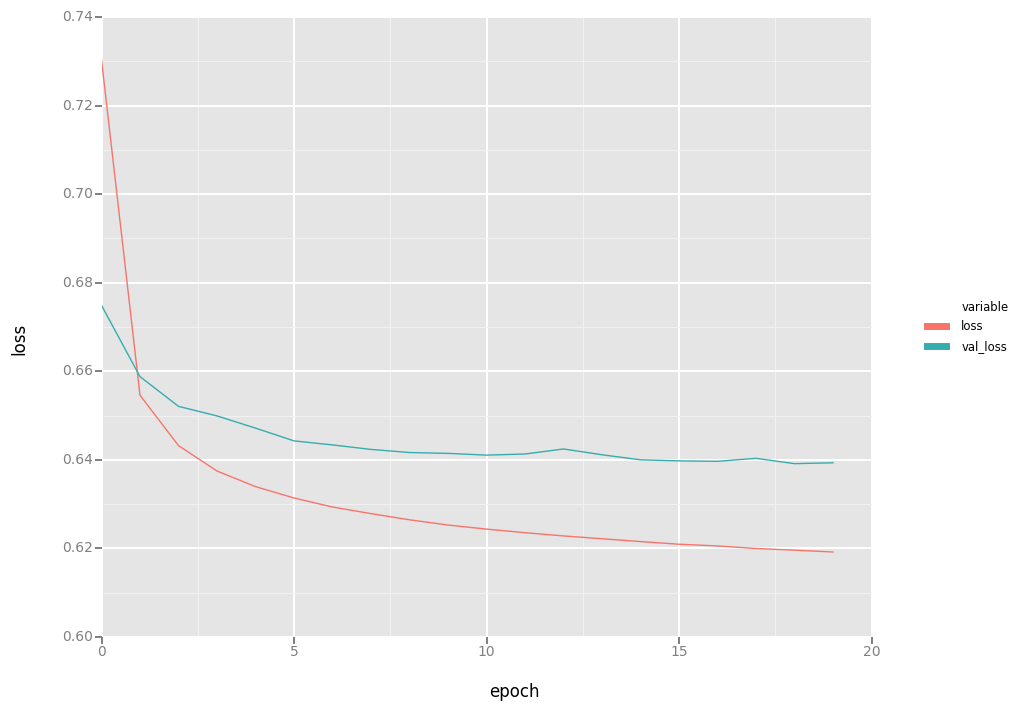

<ggplot: (322369179)>

In [13]:
ggplot.ggplot(
    ggplot.aes('epoch', 'loss', 'variable'), 
    pd.melt(df.reset_index(), value_vars=['loss', 'val_loss'], id_vars='epoch', value_name='loss')
) + ggplot.geom_line()

---
Problem
-------

Turn the logistic regression example with SGD into a 1-hidden layer neural network with rectified linear units [nn.relu()](https://www.tensorflow.org/versions/r0.7/api_docs/python/nn.html#relu) and 1024 hidden nodes. This model should improve your validation / test accuracy.

---

In [14]:
model = Sequential()
model.add(Dense(1024, input_dim=784, activation='relu')) # New layer
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(
    train_dataset, 
    train_labels, 
    validation_data=(valid_dataset, valid_labels), 
    nb_epoch=20,
    verbose=2
)

Train on 200000 samples, validate on 10000 samples
Epoch 1/20
22s - loss: 0.6050 - acc: 0.8307 - val_loss: 0.5292 - val_acc: 0.8450
Epoch 2/20
22s - loss: 0.4899 - acc: 0.8590 - val_loss: 0.4822 - val_acc: 0.8581
Epoch 3/20
22s - loss: 0.4461 - acc: 0.8715 - val_loss: 0.4497 - val_acc: 0.8640
Epoch 4/20
22s - loss: 0.4145 - acc: 0.8807 - val_loss: 0.4294 - val_acc: 0.8719
Epoch 5/20
22s - loss: 0.3903 - acc: 0.8876 - val_loss: 0.4180 - val_acc: 0.8767
Epoch 6/20
22s - loss: 0.3704 - acc: 0.8932 - val_loss: 0.4001 - val_acc: 0.8822
Epoch 7/20
22s - loss: 0.3536 - acc: 0.8983 - val_loss: 0.3903 - val_acc: 0.8849
Epoch 8/20
22s - loss: 0.3389 - acc: 0.9026 - val_loss: 0.3808 - val_acc: 0.8882
Epoch 9/20
22s - loss: 0.3257 - acc: 0.9063 - val_loss: 0.3749 - val_acc: 0.8899
Epoch 10/20
22s - loss: 0.3139 - acc: 0.9102 - val_loss: 0.3689 - val_acc: 0.8932
Epoch 11/20
22s - loss: 0.3031 - acc: 0.9132 - val_loss: 0.3668 - val_acc: 0.8933
Epoch 12/20
22s - loss: 0.2930 - acc: 0.9158 - val_loss:

In [16]:
df = DataFrame(history.history)
df.index.name = 'epoch'

In [17]:
df.head()

,acc,loss,val_acc,val_loss
epoch,,,,
0,0.830720,0.605043,0.8450,0.529175
1,0.859005,0.489911,0.8581,0.482173
2,0.871460,0.446103,0.8640,0.449652
3,0.880725,0.414483,0.8719,0.429400
4,0.887560,0.390305,0.8767,0.418022


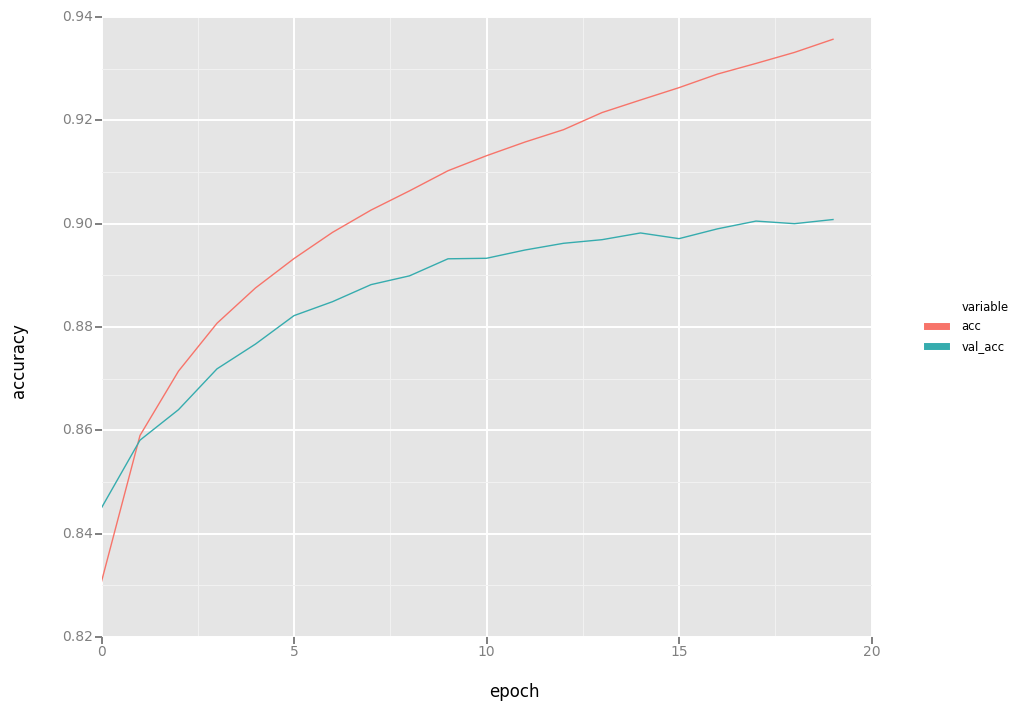

<ggplot: (-9223372036505676947)>

In [18]:
ggplot.ggplot(
    ggplot.aes('epoch', 'accuracy', 'variable'), 
    pd.melt(df.reset_index(), value_vars=['acc', 'val_acc'], id_vars='epoch', value_name='accuracy')
) + ggplot.geom_line()

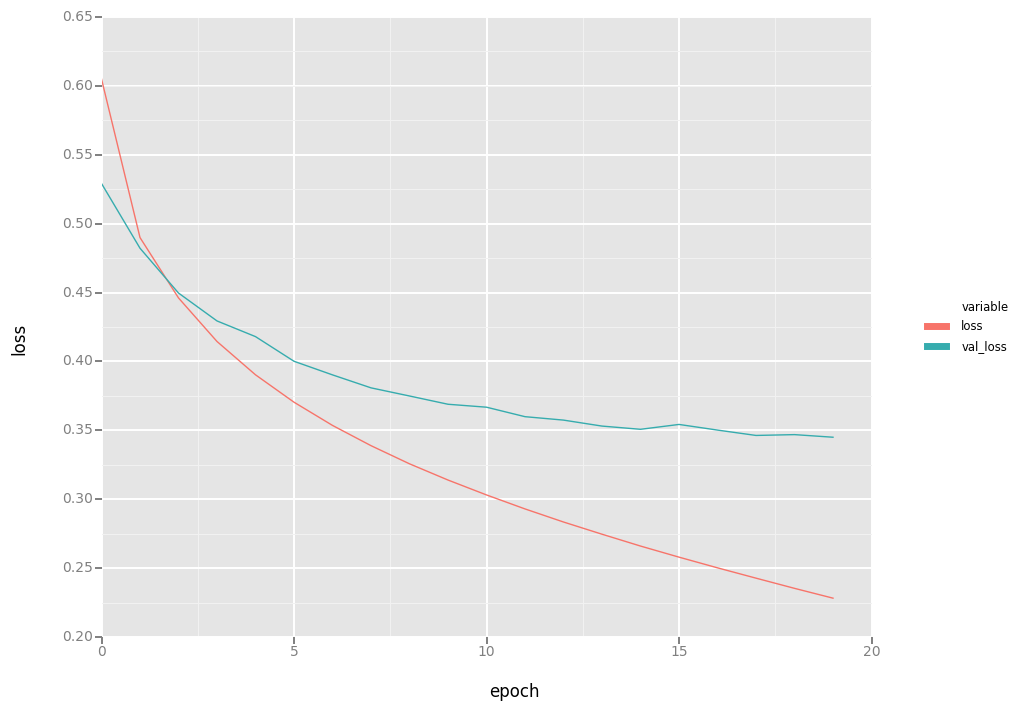

<ggplot: (349125040)>

In [19]:
ggplot.ggplot(
    ggplot.aes('epoch', 'loss', 'variable'), 
    pd.melt(df.reset_index(), value_vars=['loss', 'val_loss'], id_vars='epoch', value_name='loss')
) + ggplot.geom_line()